<a href="https://colab.research.google.com/github/lucascruz/ufpb/blob/main/MLP_ZeroTrust_TOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zero Trust e Analise trafego.

Aluno: Lucas da Silva Cruz

Professor: Tiago Maritan Ugulino de Araujo



---


Problemática:

Confiança Zero fornece uma coleção de conceitos e ideias projetadas para mitigar incertezas quando se necessita aplicar decisões de acesso por solicitação de privilégio mínimo perante uma rede considerada insegura.

Ela é vista como um plano de segurança e sendo assim ocorre a necessidade de gerar alertas para unidades que controla as decisões para oferta de maiores açoes frente a ações nocivas como por exemplo gera possilidade de identificar trafego malicioso a rede em tempo real.


---

Solução em debate:

Com base em estudo anterior [4] que se valeu do uso de modelo de regressão logística que tem por foco estima a probabilidade de ocorrência de um evento, como voto ou não voto, com base em um determinado conjunto de dados de variáveis ​​independentes a presente atividade se proproe a comparar se utilizando do mesmo "DATASET" gerado pela ações de limpeza de dados do estudo anterior e a aplicar o modelo MLP para comparar os conhecimento gerado.

---

Proposta para futuros trabalhos e a abordagem de levantar informação de falsos positivos que possa ocorrer estando em ambiente que utiliza o modelo confiança zero.

#Tor e Non-Tor - MLP


# Data Source
ORIGINAL DATASET: DarkNet 2020 dataset from the Canadian Institute for Cybersecurity at the University of New Brunswick

DATASET: Data Preparation by Amie Davis Zero_Trust - A machine learning case study for supervised binary classification. 


*Foi utilizado o mesmo dataset preparado anteriormente por Amie Davis para efeito de comparação com o novo modelo proposto usando MLP em vez de Regressão Logística.*

In [2]:
import pandas as pd

dataset = pd.read_csv('Data_cleaned_data.csv')
dataset.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Min,...,dst_ip_host,Audio-Streaming,Browsing,Chat,Email,File-Transfer,P2P,VOIP,Video-Streaming,tor_indicator
0,57158,443,6,229,1,1,8733.624454,229.00000,0.00000,229,...,99,1,0,0,0,0,0,0,0,0
1,57159,443,6,407,1,1,4914.004914,407.00000,0.00000,407,...,99,1,0,0,0,0,0,0,0,0
2,57160,443,6,431,1,1,4640.371230,431.00000,0.00000,431,...,99,1,0,0,0,0,0,0,0,0
3,49134,443,6,359,1,1,5571.030641,359.00000,0.00000,359,...,120,1,0,0,0,0,0,0,0,0
4,34697,19305,6,10778451,591,400,91.942711,10887.32424,11412.46641,13,...,127,1,0,0,0,0,0,0,0,0


In [2]:
dataset.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Min,...,dst_ip_host,Audio-Streaming,Browsing,Chat,Email,File-Transfer,P2P,VOIP,Video-Streaming,tor_indicator
count,94748.000000,94748.000000,94748.000000,9.474800e+04,94748.000000,94748.000000,9.474800e+04,9.474800e+04,9.474800e+04,9.474800e+04,...,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000
mean,38491.592910,23329.584878,8.498216,2.334172e+07,146.747573,129.187423,2.373881e+04,2.741408e+06,3.665004e+06,8.611733e+05,...,88.507641,0.018027,0.346266,0.005045,0.005330,0.072265,0.512095,0.003145,0.037827,0.014692
std,18384.534002,23287.997612,4.622047,3.928250e+07,1896.154058,1491.077454,4.479391e+05,6.954931e+06,7.851204e+06,5.494257e+06,...,79.073678,0.133049,0.475782,0.070849,0.072812,0.258928,0.499856,0.055994,0.190778,0.120316
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.666877e-02,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34117.000000,80.000000,6.000000,5.584500e+04,2.000000,0.000000,3.740367e-01,1.473200e+04,0.000000e+00,1.200000e+01,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43444.000000,14363.000000,6.000000,8.035165e+05,3.000000,2.000000,5.871474e+00,2.600740e+05,2.325698e+05,3.500000e+01,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,52299.000000,48654.000000,6.000000,1.831178e+07,5.000000,4.000000,9.231133e+01,2.945648e+06,3.145184e+06,1.429000e+03,...,157.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,65533.000000,65535.000000,17.000000,1.200000e+08,113960.000000,81630.000000,2.000000e+07,1.199849e+08,8.059627e+07,1.199849e+08,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
x = dataset.loc[:,['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
                       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
                       'Flow IAT Min', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packets',
                       'Down/Up Ratio', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
                       'Idle Mean', 'Idle Std', 'src_ip_class_a', 'src_ip_class_b',
                       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
                       'dst_ip_class_c', 'dst_ip_host', 'Audio-Streaming', 'Browsing', 'Chat',
                       'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming']].values

y = dataset['tor_indicator'].values
                      
print(x[0:3,:])

[[5.71580000e+04 4.43000000e+02 6.00000000e+00 2.29000000e+02
  1.00000000e+00 1.00000000e+00 8.73362445e+03 2.29000000e+02
  0.00000000e+00 2.29000000e+02 0.00000000e+00 0.00000000e+00
  4.36681223e+03 1.00000000e+00 1.89200000e+03 1.04700000e+03
  0.00000000e+00 0.00000000e+00 1.00000000e+01 1.52000000e+02
  1.52000000e+02 1.10000000e+01 2.16000000e+02 5.80000000e+01
  2.20000000e+02 9.90000000e+01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.71590000e+04 4.43000000e+02 6.00000000e+00 4.07000000e+02
  1.00000000e+00 1.00000000e+00 4.91400491e+03 4.07000000e+02
  0.00000000e+00 4.07000000e+02 0.00000000e+00 0.00000000e+00
  2.45700246e+03 1.00000000e+00 1.98700000e+03 1.04700000e+03
  0.00000000e+00 0.00000000e+00 1.00000000e+01 1.52000000e+02
  1.52000000e+02 1.10000000e+01 2.16000000e+02 5.80000000e+01
  2.20000000e+02 9.90000000e+01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.000

In [4]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Separar entre conjunto de treinamento e teste

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)


Normalizacao

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

#Treinamento

In [7]:
import tensorflow as tf
from keras.layers import Dropout

##Montando a Arquitetura

In [8]:
classifier = tf.keras.models.Sequential() 

In [13]:
classifier.add(tf.keras.layers.Dense(activation="relu", input_dim=34, units=256, kernel_initializer='uniform'))
classifier.add(Dropout(0.5))
classifier.add(tf.keras.layers.Dense(activation = 'relu', units=128))
classifier.add(tf.keras.layers.Dense(activation = 'relu', units=128))
classifier.add(Dropout(0.5))
classifier.add(tf.keras.layers.Dense(activation = 'relu', units=64))
classifier.add(tf.keras.layers.Dense(activation = 'relu', units=64))
classifier.add(tf.keras.layers.Dense(activation='sigmoid', units=1))

Treinamento

In [14]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

Executando treinamento

In [15]:
history=classifier.fit(x_train, y_train, batch_size=15, epochs= 100, validation_split=0.25)

Epoch 1/100
3553/3553 [==============================] - 15s 4ms/step - loss: 0.0177 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9992
Epoch 2/100
3553/3553 [==============================] - 14s 4ms/step - loss: 0.0148 - accuracy: 0.9981 - val_loss: 0.0103 - val_accuracy: 0.9986
Epoch 3/100
3553/3553 [==============================] - 14s 4ms/step - loss: 0.0154 - accuracy: 0.9977 - val_loss: 0.0286 - val_accuracy: 0.9855
Epoch 4/100
3553/3553 [==============================] - 14s 4ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 5/100
3553/3553 [==============================] - 15s 4ms/step - loss: 0.0064 - accuracy: 0.9991 - val_loss: 0.0077 - val_accuracy: 0.9994
Epoch 6/100
3553/3553 [==============================] - 14s 4ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0121 - val_accuracy: 0.9984
Epoch 7/100
3553/3553 [==============================] - 14s 4ms/step - loss: 0.0455 - accuracy: 0.9923 - val_loss: 0.0549 -

#Avaliando o Modelo

In [16]:
y_predi = classifier.predict(x_test)

print(y_test[0:35])
print(y_predi[0:35])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[[0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]
 [0.01278758]]


In [17]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_predi ] 

In [18]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
from sklearn.metrics import accuracy_score

print("O valor da acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

O valor da acurácia:  98.51817452611137 %


#Comparacao Matrix de Confusao
## Regressão Logistica x MLP

Na proposta anterior foi gerada a seguinte matrix de confusao quando e utilizado a regressao logistica.

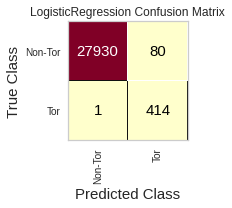

Para efeito de comparacao utilizando agora MLP foi obtido a seguinte Matrix de Confusao.

Matrix de confusão: 


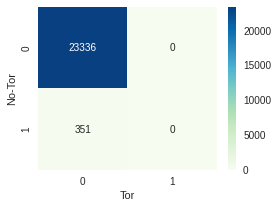

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')
plt.xlabel('Tor')
plt.ylabel('No-Tor')
plt.show()

#Comparação relatório de classificação
## Regressão Logística x MLP

Na proposta anterior foi gerado o seguinte relatório de classificação.

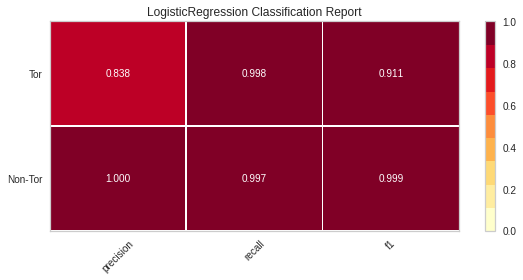


Em comparação com a proposta desse trabalho foi gerado a seguinte informação.


In [39]:
p_pred = classifier.predict(x_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

print(classification_report(y_test, y_pred, zero_division=0))

[0.01 0.01 0.01 ... 0.01 0.01 0.01]
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23336
           1       0.00      0.00      0.00       351

    accuracy                           0.99     23687
   macro avg       0.49      0.50      0.50     23687
weighted avg       0.97      0.99      0.98     23687



#Conjunto de Treinamento

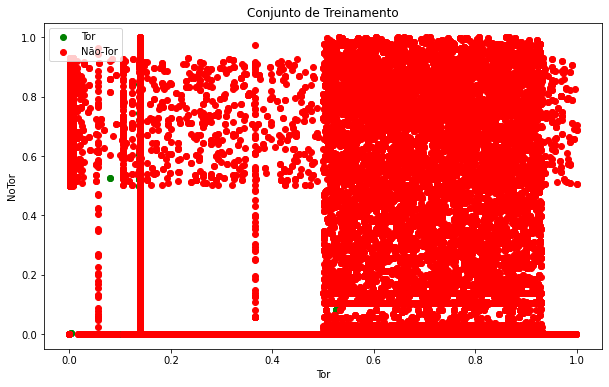

In [21]:
tor_neg = x_train[y_train == 0, 0]
notor_neg = x_train[y_train == 0, 1]
tor_pos = x_train[y_train == 1, 0]
notor_pos = x_train[y_train == 1, 1]

plt.subplots(figsize=(10, 6))
plt.scatter(tor_pos,notor_pos, color='green', label = 'Tor')
plt.scatter(tor_neg,notor_neg, color='red', label = 'Não-Tor')

plt.title('Conjunto de Treinamento')
plt.xlabel('Tor')
plt.ylabel('NoTor')
plt.legend()
plt.show()

#Gráfico de Acurácia e Loss

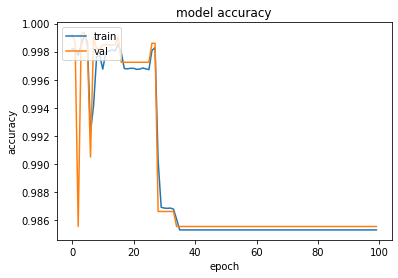

In [22]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left') 

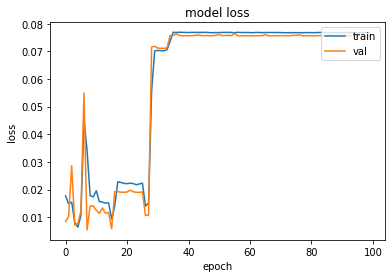

In [23]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right') 

# Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7

https://machinelearningmastery.com/calculate-feature-importance-with-python/\

[4] https://github.com/amodavis/Zero_Trust

[5] https://csrc.nist.gov/publications/detail/sp/800-207/final